<a href="https://colab.research.google.com/github/Snehakhot/Practo_Internship/blob/main/Output_SNEHA_PATIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text
import numpy as np


In [22]:

# Load the data from a CSV file
data = pd.read_csv('Recruitment_Data.csv')

# Display the first few rows of the dataframe
print(data.head())



   attrition  performance_rating  sales_quota_pct recruiting_source
0          1                   3         1.088190    Applied Online
1          0                   3         2.394173               NaN
2          1                   2         0.497530            Campus
3          0                   2         2.513958               NaN
4          0                   3         1.424789    Applied Online


**EXPLORATORY DATA ANALYSIS:**

In [25]:

# Basic information about the dataset
print("\nDataset Information:")
print(data.info())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB
None


In [24]:
# Descriptive statistics of the dataset
print("\nDescriptive Statistics of the Dataset:")
print(data.describe())



Descriptive Statistics of the Dataset:
        attrition  performance_rating  sales_quota_pct
count  446.000000          446.000000       446.000000
mean     0.213004            2.894619         1.082607
std      0.409891            0.683755         0.710042
min      0.000000            1.000000        -0.710827
25%      0.000000            2.000000         0.584444
50%      0.000000            3.000000         1.070143
75%      0.000000            3.000000         1.532488
max      1.000000            5.000000         3.666740


In [19]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64


In [20]:

# Fill missing values in 'recruiting_source' with the most common source (mode)
mode_value = data['recruiting_source'].mode()[0]
data['recruiting_source'].fillna(mode_value, inplace=True)

# Verify the missing values are filled
print("Updated missing values in each column:")
print(data.isnull().sum())



Updated missing values in each column:
attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64


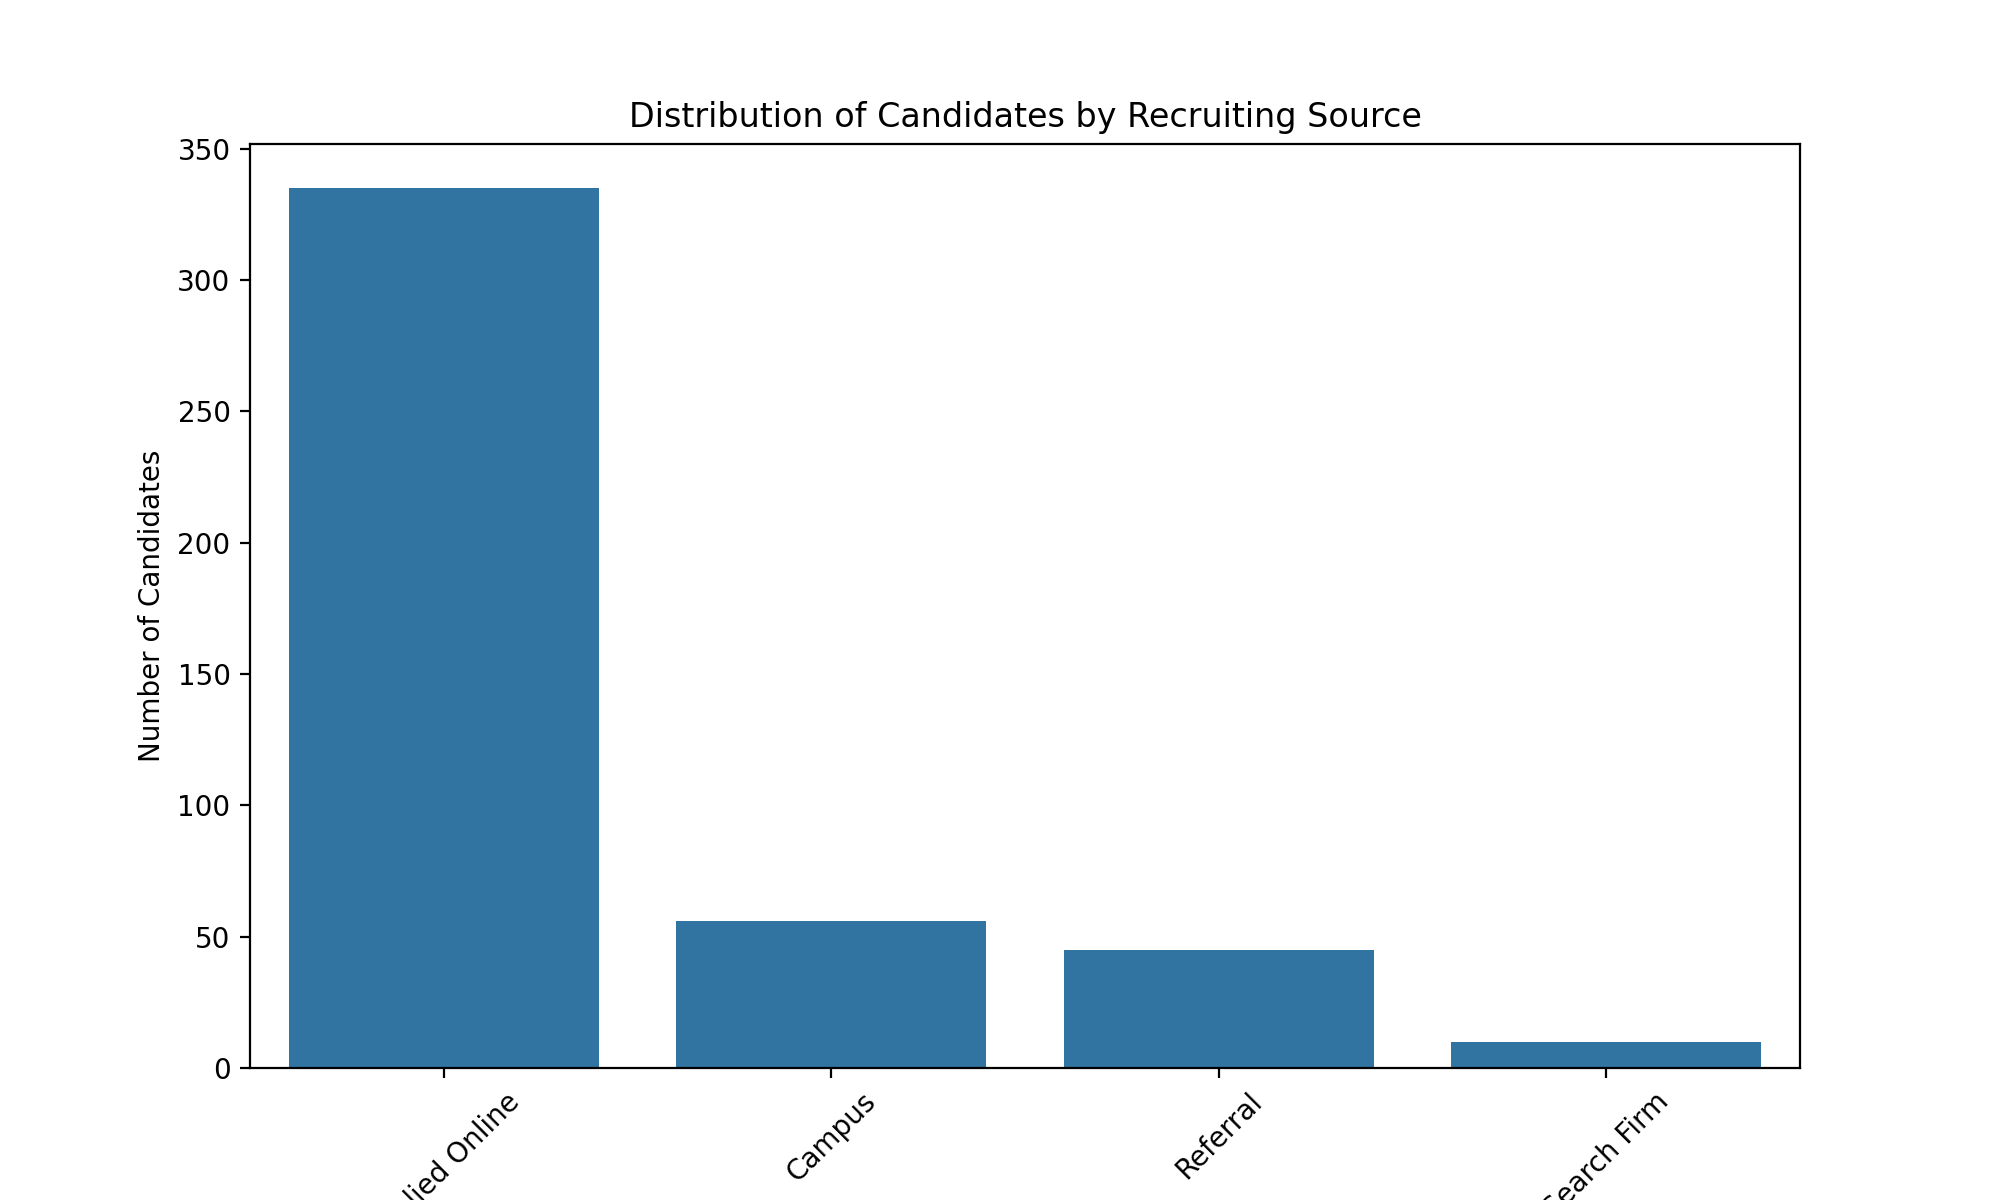

In [12]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of candidates from different sources
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='recruiting_source')
plt.title('Distribution of Candidates by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Number of Candidates')
plt.xticks(rotation=45)
plt.show()



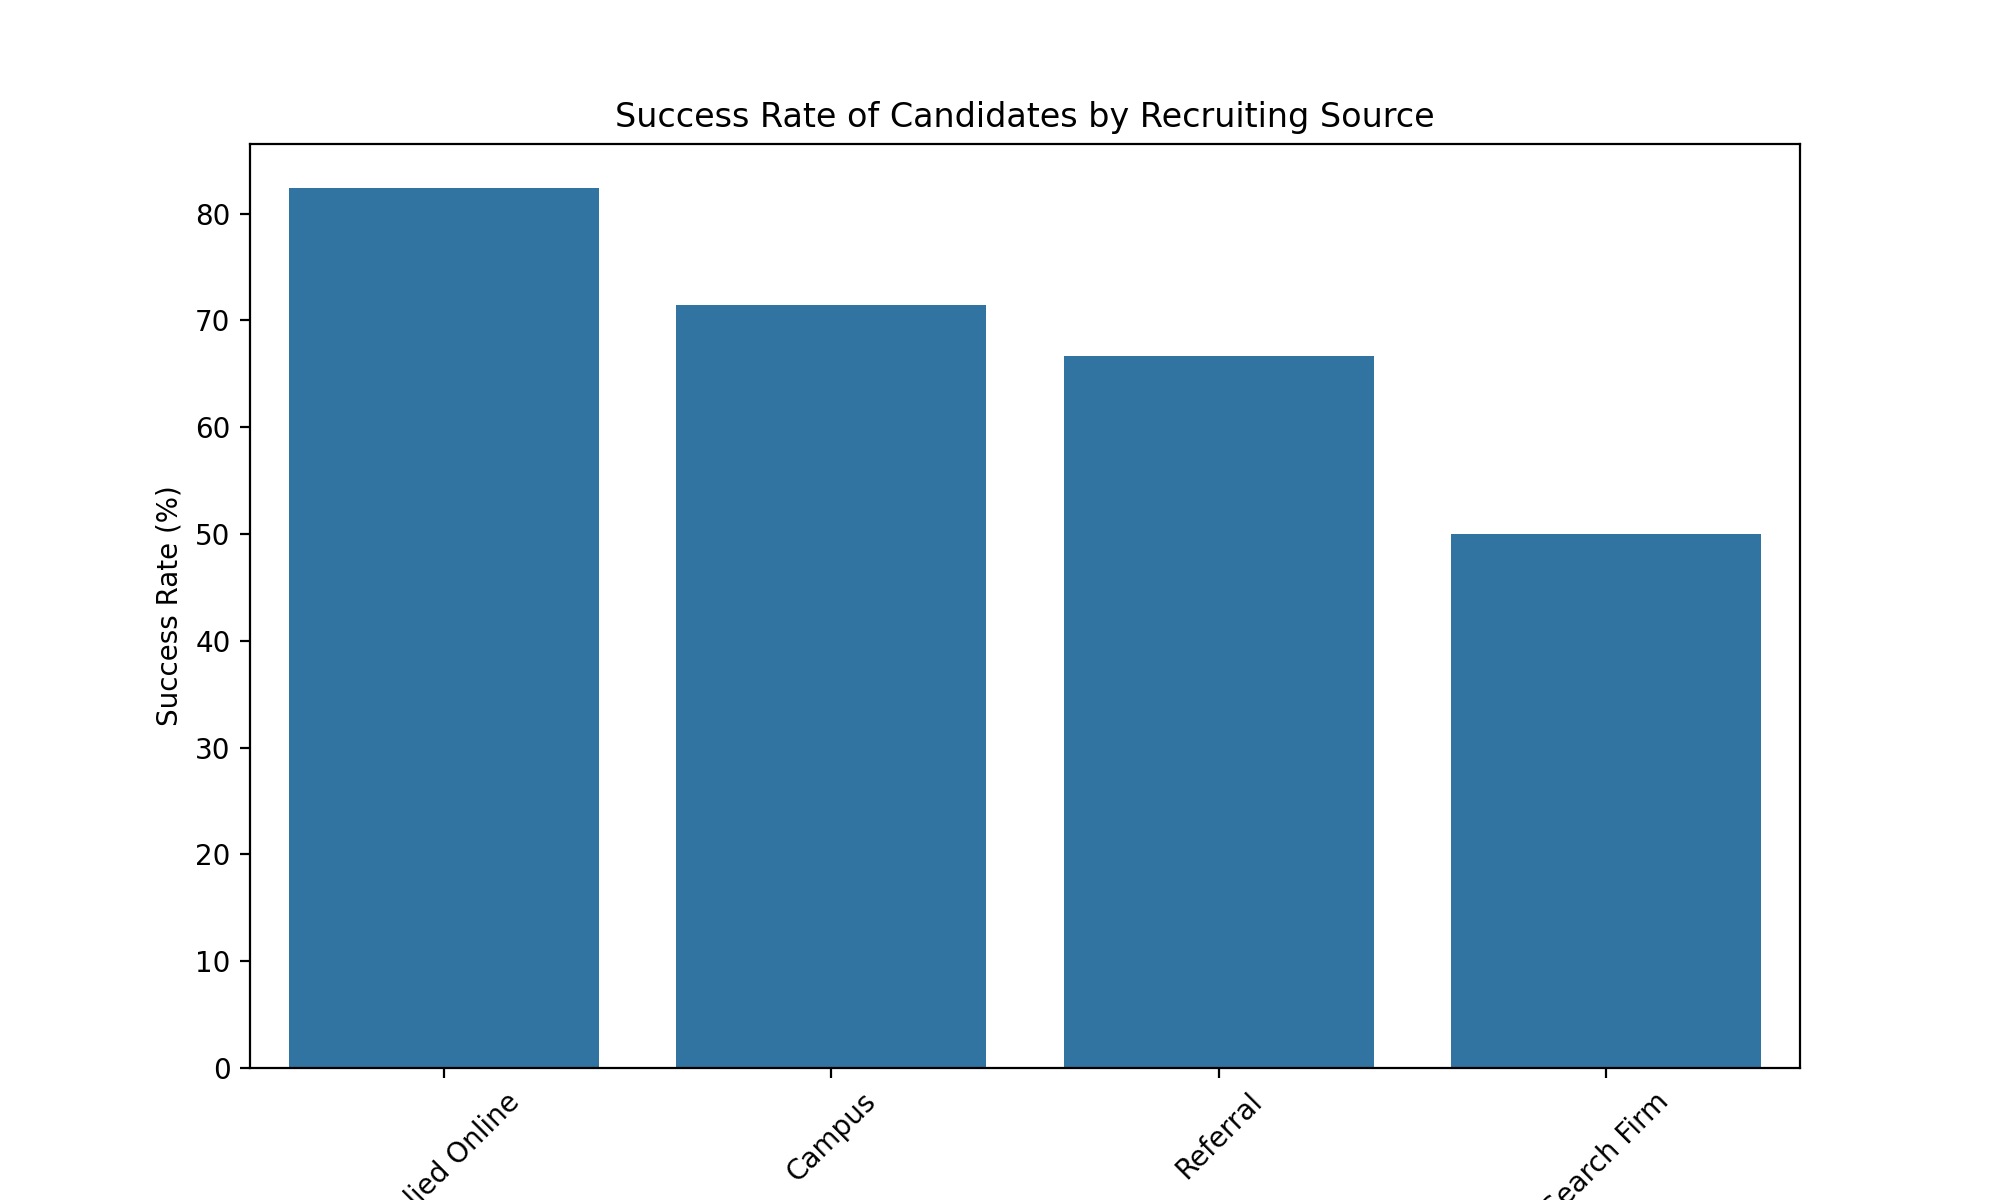

In [13]:
# Analyze the success rate of candidates from different sources
# Assuming 'attrition' column with 0 for not hired and 1 for hired
hired_data = data[data['attrition'] == 0]
hired_by_source = hired_data['recruiting_source'].value_counts()
total_by_source = data['recruiting_source'].value_counts()
success_rate = (hired_by_source / total_by_source) * 100

# Convert to DataFrame for better visualization
success_rate_df = success_rate.reset_index()
success_rate_df.columns = ['Recruiting Source', 'Success Rate']

plt.figure(figsize=(10, 6))
sns.barplot(data=success_rate_df, x='Recruiting Source', y='Success Rate')
plt.title('Success Rate of Candidates by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.show()



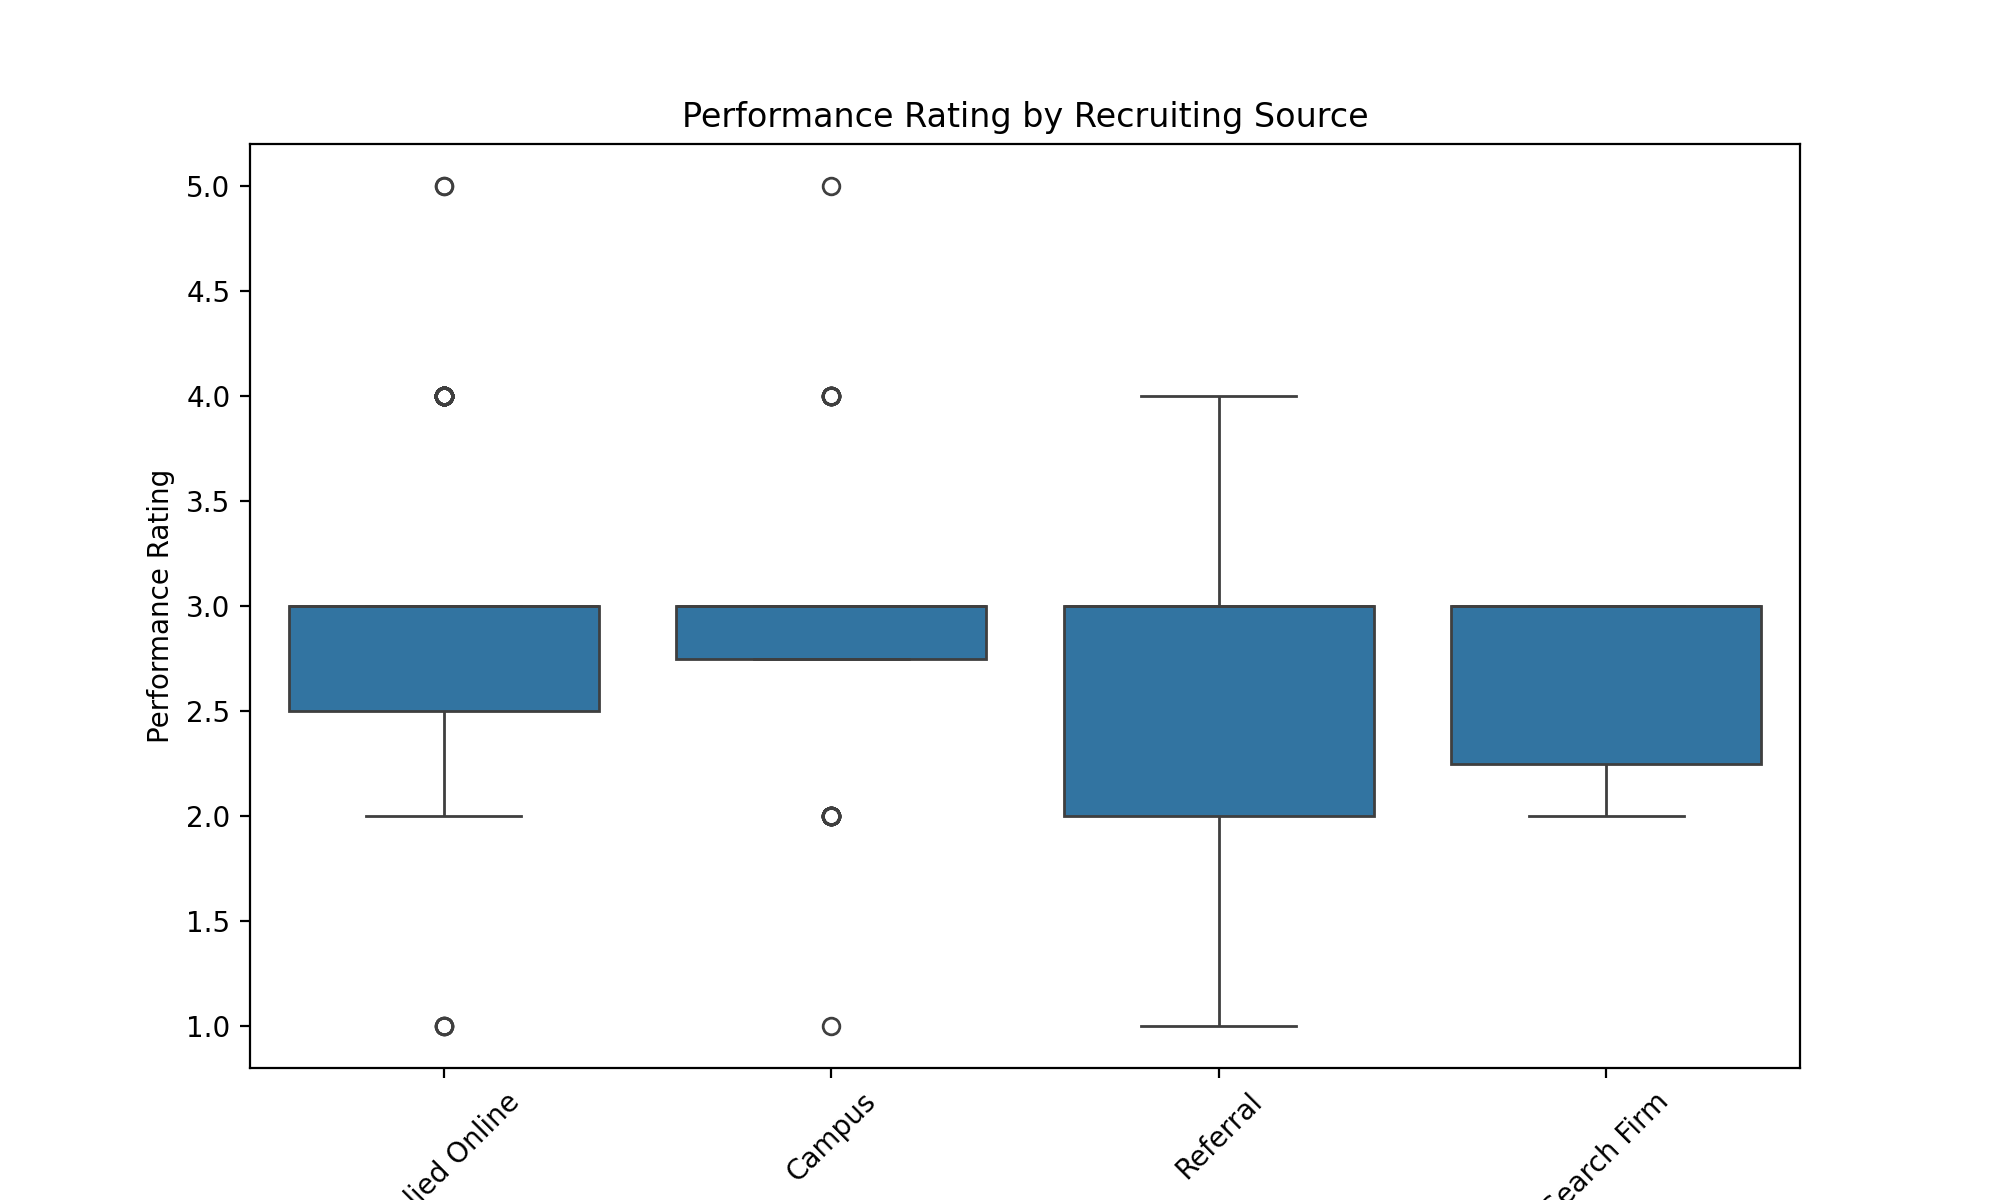

In [14]:
# Analyze the performance rating of candidates from different sources
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='recruiting_source', y='performance_rating')
plt.title('Performance Rating by Recruiting Source')
plt.xlabel('Recruiting Source')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.show()

# Calculate mean performance rating, mean sales quota percentage, and attrition rate for each group
grouped_data = data.groupby('recruiting_source').agg({
    'performance_rating': 'mean',
    'sales_quota_pct': 'mean',
    'attrition': 'mean'
}).reset_index()



In [26]:
# Display the summary statistics for each recruitment source
summary_stats = grouped_data.rename(columns={
    'performance_rating': 'Average Performance Rating',
    'sales_quota_pct': 'Average Sales Quota Percentage',
    'attrition': 'Attrition Rate'
})
print(summary_stats.sort_values(by='Average Performance Rating', ascending=False))


  recruiting_source  Average Performance Rating  \
1            Campus                    2.928571   
0    Applied Online                    2.901493   
2          Referral                    2.844444   
3       Search Firm                    2.700000   

   Average Sales Quota Percentage  Attrition Rate  
1                        0.908035        0.285714  
0                        1.125609        0.176119  
2                        1.023198        0.333333  
3                        0.886960        0.500000  


**Interpretation:**

1. Performance: Candidates recruited from Campus and Applied Online tend to have higher performance ratings.
2. Sales Quota Achievement: Candidates from Applied Online show the highest sales quota achievement.
3. Attrition Rate: Search Firm has the highest attrition rate, making it the least preferable in terms of retention. Applied Online shows the lowest attrition rate, suggesting better retention.

In [28]:

# Create a DataFrame to display the results more clearly
recruitment_performance = pd.DataFrame({
    'Recruiting Source': ['Applied Online', 'Campus', 'Referral', 'Search Firm'],
    'Average Sales Numbers': [1.125609, 0.908035, 1.023198, 0.886960],
    'Average Attrition Numbers': [0.176119, 0.285714, 0.333333, 0.5]
})

# Print the DataFrame
print("Average Sales and Attrition Numbers by Recruiting Source:")
print(recruitment_performance.sort_values(by=['Average Sales Numbers', 'Average Attrition Numbers'], ascending=[False, True]))



Average Sales and Attrition Numbers by Recruiting Source:
  Recruiting Source  Average Sales Numbers  Average Attrition Numbers
0    Applied Online               1.125609                   0.176119
2          Referral               1.023198                   0.333333
1            Campus               0.908035                   0.285714
3       Search Firm               0.886960                   0.500000


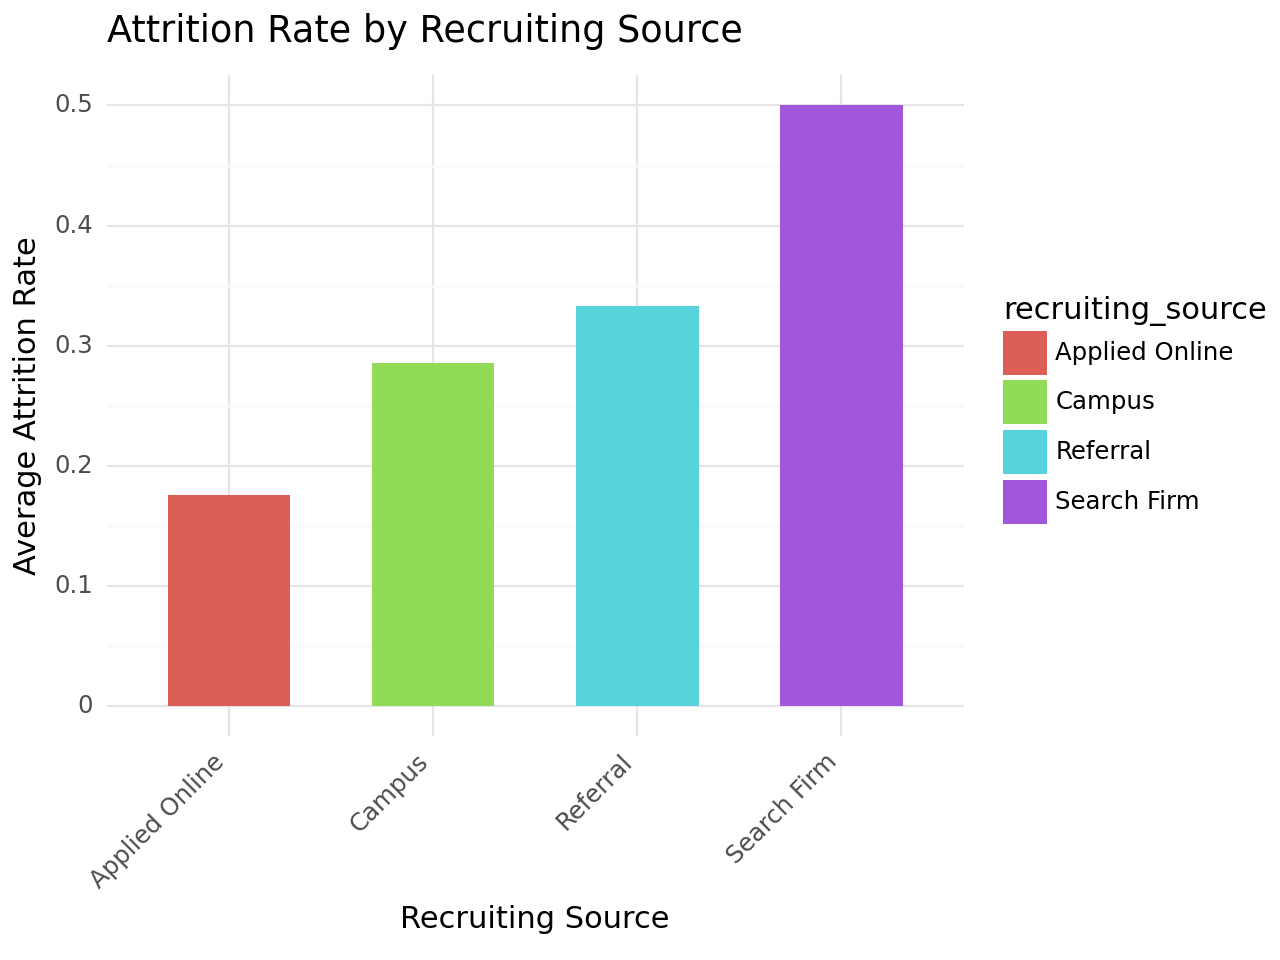

In [16]:
# Plotting Sales Performance and Attrition Rate by Recruiting Source
plot = (ggplot(summary_stats, aes(x='recruiting_source', y='Attrition Rate', fill='recruiting_source'))
        + geom_bar(stat='identity', width=0.6)
        + labs(x='Recruiting Source', y='Average Attrition Rate', title='Attrition Rate by Recruiting Source')
        + theme_minimal()
        + theme(axis_text_x=element_text(rotation=45, hjust=1)))
print(plot)


### Attrition Rate Insights:

- **Applied Online (0.176)**: Lowest attrition rate, highlighting its effectiveness in securing candidates with better job alignment and long-term retention.

- **Campus (0.286)**: Moderate attrition suggests that while campus recruits are valuable, they might benefit from more comprehensive integration and development initiatives.

- **Referral (0.333)**: Higher than expected attrition rates, indicating possible gaps in expectation management; enhanced role clarity during the referral process may mitigate this.

- **Search Firm (0.500)**: The highest attrition rate, signaling a need to reassess how these partnerships align with the company’s needs and candidate expectations.

### Recommendations:

- **Enhance Online Recruitment**: Capitalize on its success to further reduce turnover.

- **Strengthen Campus Engagement**: Focus on tailored orientation and mentoring programs to improve retention.

- **Optimize Referral Processes**: Ensure clear communication of job expectations to align candidate expectations.

- **Reevaluate Search Firm Strategies**: Critically review search firm relations to ensure better candidate-job alignment.

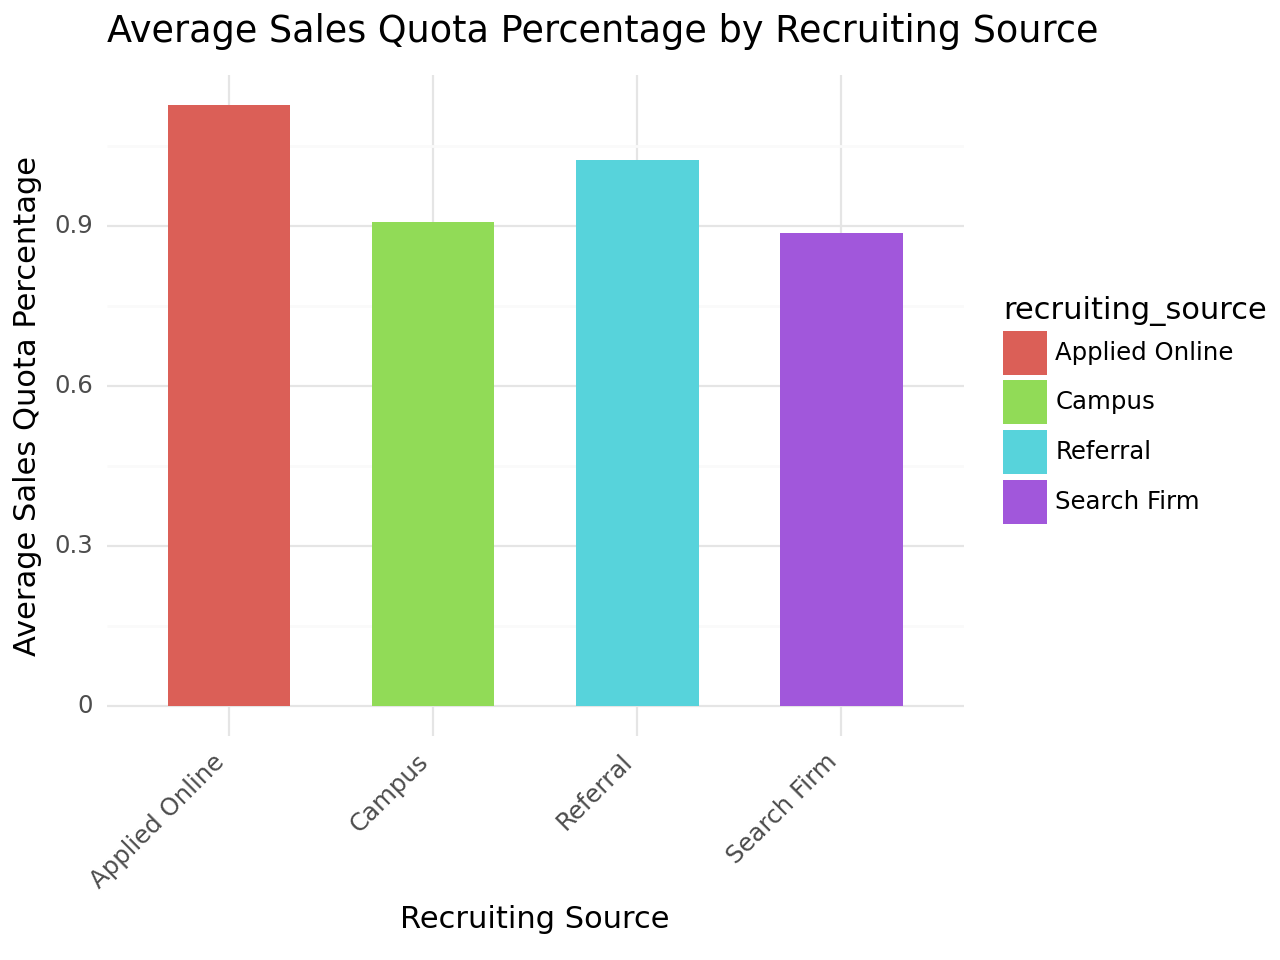

In [17]:

plot = (ggplot(summary_stats, aes(x='recruiting_source', y='Average Sales Quota Percentage', fill='recruiting_source'))
        + geom_bar(stat='identity', width=0.6)
        + labs(x='Recruiting Source', y='Average Sales Quota Percentage', title='Average Sales Quota Percentage by Recruiting Source')
        + theme_minimal()
        + theme(axis_text_x=element_text(rotation=45, hjust=1)))
print(plot)



### Sales Performance Insights:

- **Applied Online**: Highest sales numbers (1.13), indicating effective recruitment and matching processes.
  
- **Campus**: Slightly lower sales performance (0.91), suggesting potential for improvement through targeted training.
  
- **Referral**: Good sales performance (1.02), indicating the effectiveness of employee referrals in sourcing competent candidates.
  
- **Search Firm**: Lowest sales performance (0.89), suggesting a need for reevaluation of partnership strategies.

### Recommendations:

- **Invest in Online Recruitment**: Further optimize online platforms for better candidate attraction.
  
- **Support Campus and Referral Hires**: Implement targeted onboarding programs to enhance performance.
  
- **Review Search Firm Strategies**: Ensure alignment with job requirements to improve candidate quality.y of hires.

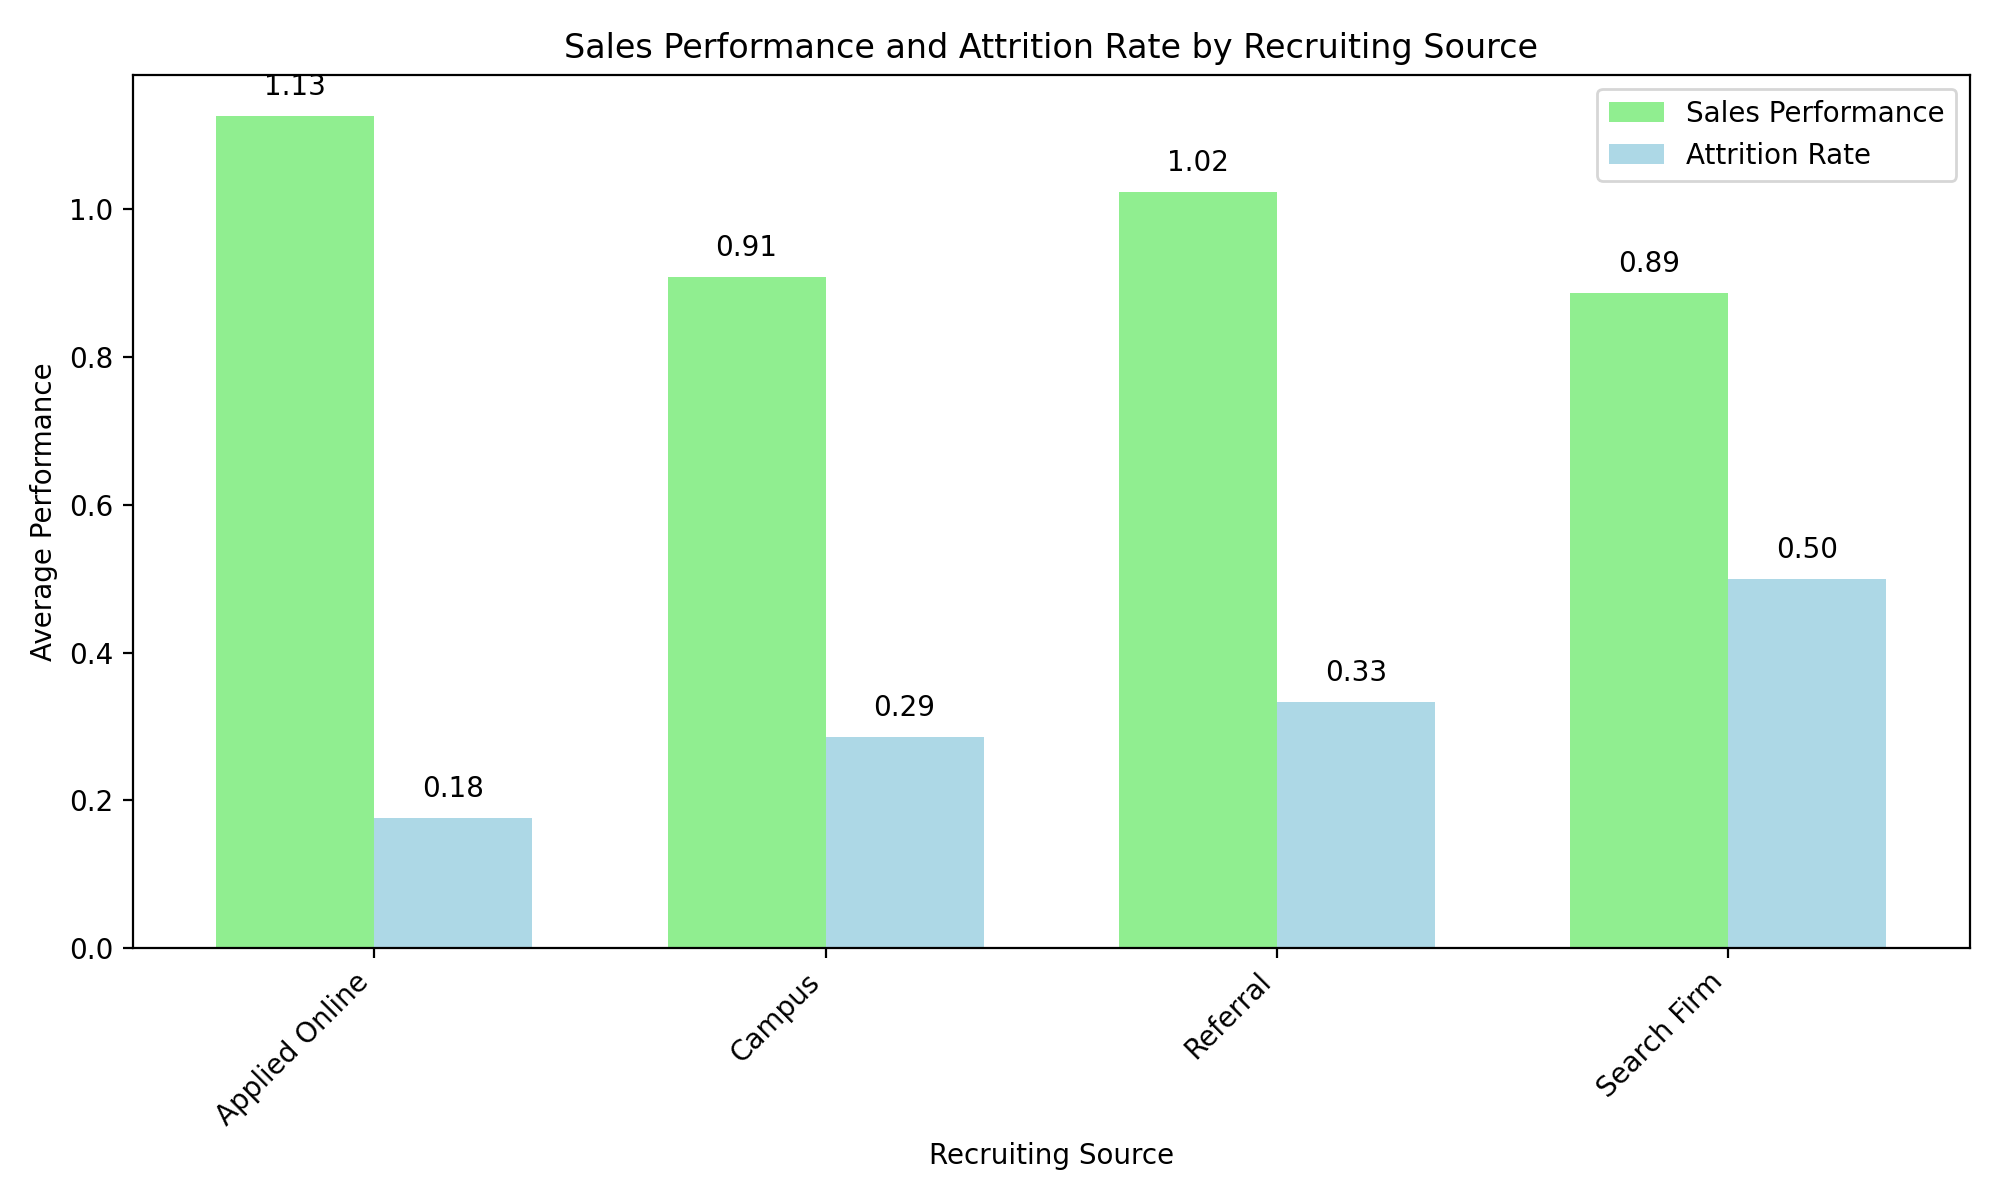

In [18]:
# Bar plot with Matplotlib for comparison
# Data
recruiting_source = ['Applied Online', 'Campus', 'Referral', 'Search Firm']
attrition = [0.176119, 0.285714, 0.333333, 0.5]
sales_performance = [1.125609, 0.908035, 1.023198, 0.886960]

# Setting the width of the bars
bar_width = 0.35

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Position for each bar
x = np.arange(len(recruiting_source))

# Plotting sales performance bars
sales_bars = ax.bar(x, sales_performance, width=bar_width, label='Sales Performance', color='lightgreen')

# Plotting attrition rate bars
attrition_bars = ax.bar(x + bar_width, attrition, width=bar_width, label='Attrition Rate', color='lightblue')

# Annotating bars with values
for i, sales in enumerate(sales_performance):
    ax.text(i, sales + 0.02, f'{sales:.2f}', ha='center', va='bottom')

for i, attr in enumerate(attrition):
    ax.text(i + bar_width, attr + 0.02, f'{attr:.2f}', ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Recruiting Source')
ax.set_ylabel('Average Performance')
ax.set_title('Sales Performance and Attrition Rate by Recruiting Source')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(recruiting_source)
ax.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as an image
plt.savefig('sales_attrition_comparison.png')

# Displaying the plot
plt.tight_layout()
plt.show()


### Conclusions and Recommendations

**Applied Online** stands out as the optimal recruiting source due to its low attrition rates and high sales numbers, indicating strong job satisfaction and performance. Online platforms also provide scalable access to a diverse candidate pool, enhancing recruitment quality.

### Strategic Takeaways

- **Enhance Online Recruitment**: Increase investment in online recruiting tools to maximize their effectiveness and reach.
- **Improve Other Recruitment Sources**:
  - **Campus Recruiting**: Implement mentorship and development programs to reduce attrition and support young recruits.
  - **Referrals**: Clarify job expectations during the referral process to ensure candidates have a realistic understanding of their roles.
  - **Search Firms**: Reassess and adjust strategies to enhance candidate-job alignment, focusing on quality and long-term fit.